# Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from yellowbrick.text import TSNEVisualizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams
from wordcloud import wordcloud
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA
import nltk
from nltk.corpus import gutenberg, stopwords, wordnet, words
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import random
from sklearn.metrics.pairwise import cosine_similarity

import warnings

warnings.filterwarnings("ignore")

# Download the NLTK

In [2]:
nltk.download("words")
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
stop_words = set(stopwords.words("english"))
english_words = set(words.words())


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Data Preprocessing

## Read the data

In [3]:
df = pd.read_csv(
    "booksummaries.txt",
    header=None,
    sep="\t",
    names=[
        "Wikipedia ID",
        "Freebase ID",
        "Book Title",
        "Book Author",
        "Pub date",
        "Genres",
        "Summary",
    ],
)


In [4]:
df

,Wikipedia ID,Freebase ID,Book Title,Book Author,Pub date,Genres,Summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ..."
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,Colbert addresses topics including Wall Stree...


## Function to display the number of words

In [5]:
def count_words(text):
    return len(text.split())

df["word_count"] = df["Summary"].apply(count_words)


In [6]:
df

,Wikipedia ID,Freebase ID,Book Title,Book Author,Pub date,Genres,Summary,word_count
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca...",957
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan...",998
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...,1119
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,2825
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...,722
...,...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ...",151
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...,211
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...,307
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,Colbert addresses topics including Wall Stree...,20


## Data Understanding

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16559 entries, 0 to 16558
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Wikipedia ID  16559 non-null  int64 
 1   Freebase ID   16559 non-null  object
 2   Book Title    16559 non-null  object
 3   Book Author   14177 non-null  object
 4   Pub date      10949 non-null  object
 5   Genres        12841 non-null  object
 6   Summary       16559 non-null  object
 7   word_count    16559 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.0+ MB


## Plot NULL values

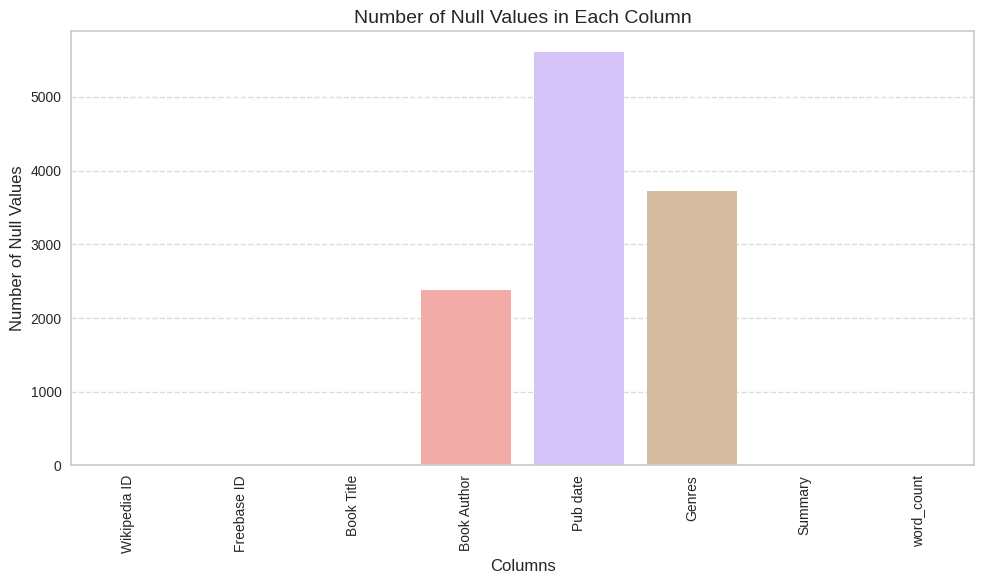

In [8]:
null_counts = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='pastel')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Null Values', fontsize=12)
plt.title('Number of Null Values in Each Column', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate the x-axis labels for better readability if needed
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Drop the Nulls from the Genres column

In [9]:
df = df.dropna(subset=["Genres"])

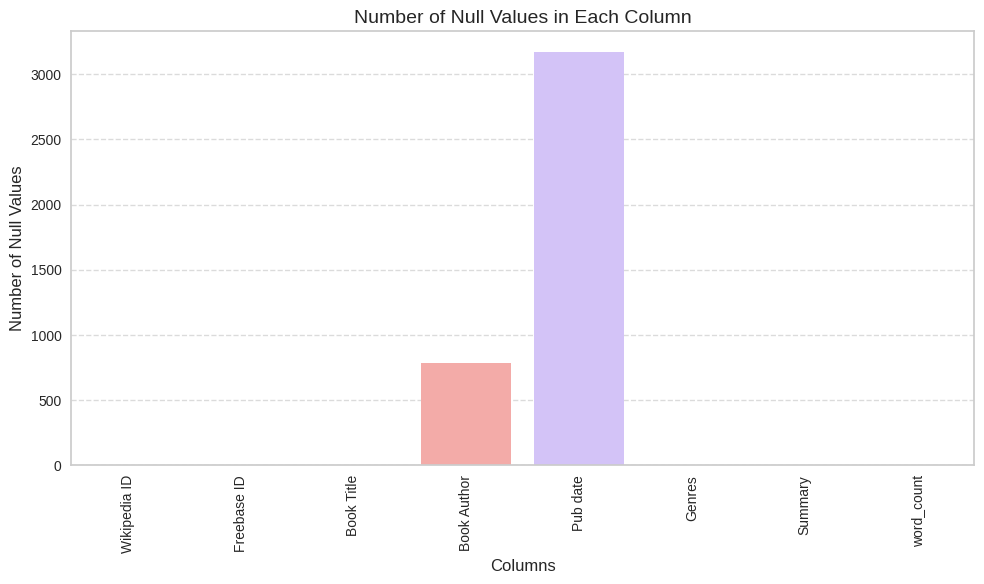

In [10]:
null_counts = df.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='pastel')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Null Values', fontsize=12)
plt.title('Number of Null Values in Each Column', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate the x-axis labels for better readability if needed
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Clean the Genres column

In [11]:
# transform the data in the Genres column from JSON format to a list of genres
try:
    df["Genres"] = df["Genres"].map(
        lambda genre: list(json.loads(genre).values()))
except TypeError:
    print("error")


In [12]:
df

,Wikipedia ID,Freebase ID,Book Title,Book Author,Pub date,Genres,Summary,word_count
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"[Roman à clef, Satire, Children's literature, ...","Old Major, the old boar on the Manor Farm, ca...",957
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan...",998
2,986,/m/0ldx,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...,1119
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...,722
5,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge...",770
...,...,...,...,...,...,...,...,...
16549,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,[Science Fiction],The story starts with former government agent...,160
16551,36534061,/m/072y44,Remote Control,Andy McNab,1997,"[Thriller, Fiction, Suspense]",The series follows the character of Nick Ston...,57
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"[Thriller, Fiction]",The reader first meets Rapp while he is doing...,211
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,[Autobiography],The book follows very rough chronological ord...,307


## Take a random split from the data

In [13]:
random_sample = df.sample(n=1000, random_state=42)

In [14]:
random_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 10289 to 14322
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Wikipedia ID  1000 non-null   int64 
 1   Freebase ID   1000 non-null   object
 2   Book Title    1000 non-null   object
 3   Book Author   950 non-null    object
 4   Pub date      754 non-null    object
 5   Genres        1000 non-null   object
 6   Summary       1000 non-null   object
 7   word_count    1000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 70.3+ KB


## Preprocessing the text feature

**Define our wordnet**

In [15]:
def get_word_net_pos(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN


**Remove stop words and lemmatizing the text**

In [16]:
lemmatizer = WordNetLemmatizer()
def preprocess_sentence(sentence):
    # Tokenize and convert to lowercase
    words = nltk.word_tokenize(sentence.lower())
    filtered_words = [
        word for word in words if word not in stop_words and len(word) >= 3
    ]
    sent = ""
    x = nltk.pos_tag(filtered_words)
    for word, tag in x:
        lemma = lemmatizer.lemmatize(word, pos=get_word_net_pos(tag))
        sent += lemma + " "
    sentence = regexp_tokenize(sent, r"([a-zA-Z]{3,})[\s]")
    return " ".join(sentence)


In [17]:
random_sample["Processed_Sentences"] = random_sample["Summary"].apply(
    preprocess_sentence
)


In [18]:
random_sample

,Wikipedia ID,Freebase ID,Book Title,Book Author,Pub date,Genres,Summary,word_count,Processed_Sentences
10289,12200712,/m/02vvm7d,Bitter Lemons,Lawrence Durrell,NaN,"[Reference, Non-fiction]","The book is alternately comic and serious, ch...",324,book alternately comic serious chart durrell e...
14582,24694031,/m/080nbjn,Touch the Dark,NaN,2006-06,[Urban fantasy],Cassandra Palmer is a clairvoyant. She can se...,495,cassandra palmer clairvoyant see vision future...
9975,11494990,/m/02rftn2,Starcross,Philip Reeve,2007-10,"[Science Fiction, Children's literature, Specu...","Protagonist Arthur (""Art"") Mumby and his olde...",321,protagonist arthur art mumby old sister myrtle...
10735,13340278,/m/03c273l,Wintle's Wonders,Noel Streatfeild,1957,[Children's literature],"As the book begins, Rachel and her adopted si...",333,book begin rachel adopt sister hilary living r...
10532,12861063,/m/02x87t_,These Happy Golden Years,Laura Ingalls Wilder,1943,"[Western, Children's literature, Fiction]","As the story begins, Pa is taking Laura 12 mi...",851,story begin take laura mile home dead winter f...
...,...,...,...,...,...,...,...,...,...
6915,5811678,/m/0f6hkg,A Stroke of Midnight,Laurell K. Hamilton,2005-04-12,"[Fantasy, Speculative fiction, Horror, Fiction...",Following on almost immediately from the even...,128,follow almost immediately event seduce moonlig...
6565,5413890,/m/0dksqv,The God Delusion,Richard Dawkins,2006,"[Philosophy, Science, Non-fiction]",Dawkins dedicates the book to Douglas Adams a...,980,dawkins dedicates book douglas adams quote nov...
14538,24602332,/m/080h189,Wolf: The Journey Home,'Asta Bowen,1997-01-13,[Young adult literature],"Marta, a black gray wolf, is alpha female in ...",848,marta black gray wolf alpha female small pack ...
12092,17080244,/m/0417kxx,The Fall of Colossus,Dennis Feltham Jones,1974,"[Science Fiction, Speculative fiction]",Five years have passed since the computer kno...,538,five year pass since computer know colossus us...


## Using Word2Vev to transform the text feature to its representation numbers

In [19]:
def word2vec_transform():
    # Train the Word2Vec model
    sentences = [
        paragraph.split() for paragraph in random_sample["Processed_Sentences"]
    ]
    model = Word2Vec(sentences, vector_size=50,
                     window=5, min_count=1, epochs=100)

    # Transform each paragraph using Word2Vec
    transformed_data = []
    for paragraph in sentences:
        paragraph_vector = np.mean([model.wv[word]
                                   for word in paragraph], axis=0)
        transformed_data.append(paragraph_vector)

    # Create a DataFrame from the transformed data
    vocab = [f"feature_{i+1}" for i in range(model.vector_size)]
    data = pd.DataFrame(transformed_data, columns=vocab)

    return data


In [20]:
train_data = word2vec_transform()

# Clustering

**Silhoutte score function**

In [21]:
def silhouettescore(X, pred_y):
    score = silhouette_score(X, pred_y) * 100
    return score


## Get the best K for K-Means

**We used the kmeans algorithm and run it for a range numbers to decide the best number of clusters**

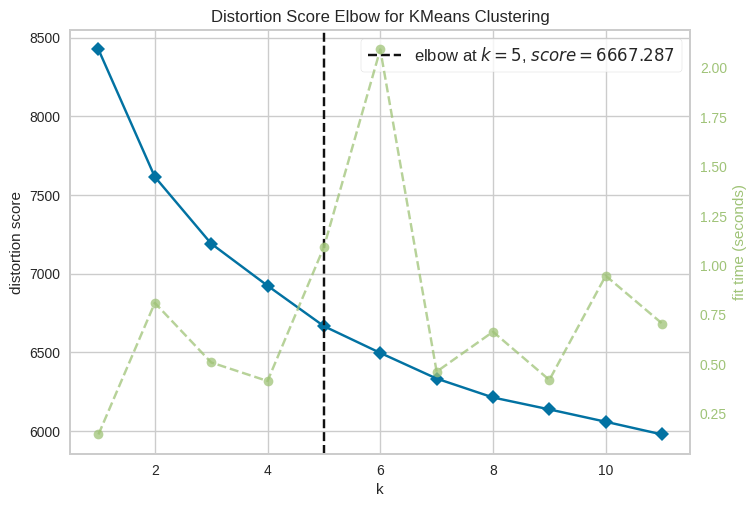

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
inertias = []
kc = KMeans(n_clusters=8, random_state=42)
visualizer = KElbowVisualizer(kc, k=(1, 12), colors="red", bg="grey")
visualizer.fit(train_data)
visualizer.show()

## K-Means with K=5

** We used the Kmeans for 5 number of clusters as it is the best number according to silhoutte score**

In [23]:
def KMEANS(data, num_cluster):
    km_cls = KMeans(
        n_clusters=num_cluster,
        init="k-means++",
        max_iter=300,
        n_init=10,
        random_state=42,
    )
    km_cls.fit(data)
    km_labels = km_cls.predict(data)
    score = silhouettescore(data, km_labels)
    return km_labels, score

In [24]:
labels, score = KMEANS(train_data, 5)

## Visualizing the TSNE plot for our data and its labels

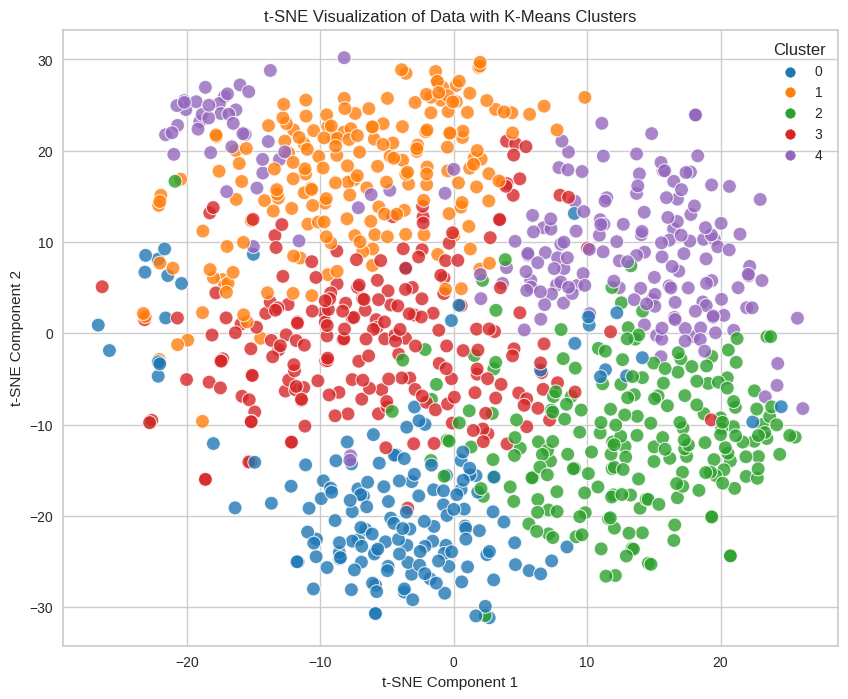

In [25]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(train_data)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=labels, palette='tab10', s=100, alpha=0.8)
plt.title("t-SNE Visualization of Data with K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()


## Assigning new genres to the clusters

**Check the most frequent genre of the cluster to assign the best genre**

In [26]:
# Taking subsets of the data
random_sample["labels"] = labels
random_sample_0 = random_sample[random_sample["labels"] == 0]
random_sample_1 = random_sample[random_sample["labels"] == 1]
random_sample_2 = random_sample[random_sample["labels"] == 2]
random_sample_3 = random_sample[random_sample["labels"] == 3]
random_sample_4 = random_sample[random_sample["labels"] == 4]


In [27]:
# Getting the most frequent gnere for the cluster with labels 0
genres = list()
for genre in random_sample_0["Genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))


Counter({'Mystery': 79, 'Fiction': 76, 'Crime Fiction': 54, 'Suspense': 48, 'Detective fiction': 29, 'Speculative fiction': 27, 'Novel': 26, 'Thriller': 19, "Children's literature": 16, 'Science Fiction': 13, 'Spy fiction': 9, 'Young adult literature': 7, 'Fantasy': 7, 'Adventure novel': 5, 'Historical novel': 4, 'Horror': 4, 'Comedy': 3, 'Comic novel': 2, 'Satire': 2, 'Whodunit': 2, 'Romance novel': 2, 'Hardboiled': 2, 'Tragicomedy': 1, 'War novel': 1, 'Novella': 1, 'Historical fiction': 1, 'Historical whodunnit': 1, 'Music': 1, 'Short story': 1, 'Autobiography': 1, 'Biography': 1, 'True crime': 1, 'Black comedy': 1, 'Historical fantasy': 1, 'Cabal': 1, 'Conspiracy': 1, 'Cyberpunk': 1, 'Utopian and dystopian fiction': 1, 'Gothic fiction': 1, 'Parallel novel': 1})


In [28]:
# Getting the most frequent gnere for the cluster with labels 1
genres = list()
for genre in random_sample_1["Genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Science Fiction': 132, 'Speculative fiction': 121, 'Fiction': 63, 'Fantasy': 39, 'Novel': 34, 'Alternate history': 16, "Children's literature": 12, 'Thriller': 10, 'Horror': 9, 'Adventure novel': 6, 'Mystery': 6, 'Dystopia': 5, 'Historical novel': 5, 'Utopian and dystopian fiction': 5, 'Historical fiction': 5, 'Spy fiction': 5, 'Apocalyptic and post-apocalyptic fiction': 4, 'Military science fiction': 3, 'Techno-thriller': 3, 'Satire': 3, 'Suspense': 3, 'Romance novel': 3, 'Young adult literature': 2, 'Western fiction': 2, 'Lost World': 1, 'Short story': 1, 'War novel': 1, 'Crime Fiction': 1, 'Wuxia': 1, 'Non-fiction': 1, 'Adventure': 1, 'Science fantasy': 1, 'Scientific romance': 1, 'Politics': 1, 'Vampire fiction': 1, 'New York Times Best Seller list': 1, 'Epic Science Fiction and Fantasy': 1, 'Role-playing game': 1, 'Religion': 1, 'Time travel': 1, 'Historical fantasy': 1, 'Post-holocaust': 1, 'Hard science fiction': 1, 'History': 1, 'Travel': 1, 'Western': 1, 'Dark fantas

In [29]:
# Getting the most frequent gnere for the cluster with labels 2
# We notice that the genre Fiction is the most frequent genre in two cluster wo we take Children's literature as this cluster's genre
genres = list()
for genre in random_sample_2["Genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Fiction': 87, 'Novel': 64, "Children's literature": 51, 'Young adult literature': 29, 'Speculative fiction': 28, 'Romance novel': 20, 'Mystery': 11, 'Fantasy': 9, 'Suspense': 9, 'Historical novel': 9, 'Crime Fiction': 8, 'Historical fiction': 6, 'Science Fiction': 6, 'Horror': 6, 'Thriller': 5, 'Autobiography': 5, 'Comedy': 4, 'Adventure novel': 4, 'Satire': 4, 'Novella': 4, 'Chick lit': 4, 'Roman à clef': 3, 'Drama': 3, 'Bildungsroman': 3, 'Biography': 3, 'Gothic fiction': 3, 'Short story': 2, 'Spy fiction': 2, 'Picaresque novel': 2, 'Memoir': 2, 'Picture book': 2, 'Autobiographical novel': 2, 'Western': 1, 'Religious text': 1, 'Literary realism': 1, 'Hardboiled': 1, 'Industrial novel': 1, 'Detective fiction': 1, 'Literary fiction': 1, 'Philosophy': 1, 'Magic realism': 1, 'Künstlerroman': 1, 'Supernatural': 1, 'Reference': 1, 'Comic novel': 1, 'Psychology': 1, 'Serial': 1, 'Social commentary': 1, 'Fairy tale': 1, 'Non-fiction': 1, 'Erotica': 1, 'Poetry': 1, 'Epistolary novel

In [30]:
# Getting the most frequent gnere for the cluster with labels 3
genres = list()
for genre in random_sample_3["Genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Fantasy': 111, 'Speculative fiction': 97, 'Fiction': 73, "Children's literature": 61, 'Science Fiction': 44, 'Novel': 19, 'Young adult literature': 17, 'Adventure novel': 12, 'Horror': 10, 'Historical fiction': 9, 'Mystery': 9, 'Historical novel': 8, 'Comedy': 7, 'High fantasy': 6, 'Steampunk': 5, 'Alternate history': 5, 'Dystopia': 4, 'Absurdist fiction': 4, 'Gothic fiction': 4, 'Humour': 3, 'Apocalyptic and post-apocalyptic fiction': 3, 'Short story': 3, 'Suspense': 3, 'Gamebook': 3, 'Urban fantasy': 2, 'Postmodernism': 2, 'Dark fantasy': 2, 'Satire': 2, 'History': 2, 'Crime Fiction': 2, 'Romance novel': 2, 'Novella': 1, 'Utopian and dystopian fiction': 1, 'Play': 1, 'Western': 1, 'Poetry': 1, 'Memoir': 1, 'Spy fiction': 1, 'Dying Earth subgenre': 1, 'Non-fiction': 1, 'Sword and sorcery': 1, 'Comic novel': 1, 'Lost World': 1, 'Comic science fiction': 1, 'Biography': 1, 'Autobiography': 1, 'Thriller': 1, 'Historical fantasy': 1, 'Autobiographical novel': 1, 'War novel': 1, '

In [31]:
# Getting the most frequent gnere for the cluster with labels 4
genres = list()
for genre in random_sample_4["Genres"]:
    for i in range(len(genre)):
        genres.append(genre[i])
print(Counter(genres))

Counter({'Fiction': 70, 'Novel': 61, 'Speculative fiction': 50, 'Science Fiction': 36, 'Non-fiction': 18, 'Historical novel': 16, 'Fantasy': 12, 'Mystery': 12, 'Historical fiction': 10, "Children's literature": 10, 'Thriller': 9, 'Suspense': 9, 'Young adult literature': 7, 'Horror': 7, 'Utopian and dystopian fiction': 6, 'Autobiography': 5, 'Dystopia': 5, 'Romance novel': 5, 'Adventure novel': 5, 'Comic novel': 4, 'History': 4, 'Reference': 3, 'Detective fiction': 3, 'Science': 3, 'Comedy': 3, 'Magic realism': 2, 'Short story': 2, 'Spy fiction': 2, 'Travel': 2, 'Satire': 2, 'Graphic novel': 2, 'Philosophy': 2, 'Crime Fiction': 1, 'Education': 1, 'Epistolary novel': 1, 'Non-fiction novel': 1, 'Memoir': 1, 'Economics': 1, 'Social sciences': 1, 'Soft science fiction': 1, 'Role-playing game': 1, 'Sociology': 1, 'Literary criticism': 1, 'Sports': 1, 'Adventure': 1, 'Absurdist fiction': 1, 'Comic fantasy': 1, 'Humour': 1, 'Apocalyptic and post-apocalyptic fiction': 1, 'Novella': 1, 'Religion

**Assigning the most frequent genre for each cluster as it's new genre**

In [32]:
random_sample.loc[random_sample["labels"] == 0, "Genres"] = "Mystery"
random_sample.loc[random_sample["labels"] == 1, "Genres"] = "Science Fiction"
random_sample.loc[random_sample["labels"] == 2, "Genres"] = "Children's literature"
random_sample.loc[random_sample["labels"] == 3, "Genres"] = "Fantasy"
random_sample.loc[random_sample["labels"] == 4, "Genres"] = "Fiction"

In [33]:
random_sample

,Wikipedia ID,Freebase ID,Book Title,Book Author,Pub date,Genres,Summary,word_count,Processed_Sentences,labels
10289,12200712,/m/02vvm7d,Bitter Lemons,Lawrence Durrell,NaN,Fiction,"The book is alternately comic and serious, ch...",324,book alternately comic serious chart durrell e...,4
14582,24694031,/m/080nbjn,Touch the Dark,NaN,2006-06,Fantasy,Cassandra Palmer is a clairvoyant. She can se...,495,cassandra palmer clairvoyant see vision future...,3
9975,11494990,/m/02rftn2,Starcross,Philip Reeve,2007-10,Fantasy,"Protagonist Arthur (""Art"") Mumby and his olde...",321,protagonist arthur art mumby old sister myrtle...,3
10735,13340278,/m/03c273l,Wintle's Wonders,Noel Streatfeild,1957,Children's literature,"As the book begins, Rachel and her adopted si...",333,book begin rachel adopt sister hilary living r...,2
10532,12861063,/m/02x87t_,These Happy Golden Years,Laura Ingalls Wilder,1943,Children's literature,"As the story begins, Pa is taking Laura 12 mi...",851,story begin take laura mile home dead winter f...,2
...,...,...,...,...,...,...,...,...,...,...
6915,5811678,/m/0f6hkg,A Stroke of Midnight,Laurell K. Hamilton,2005-04-12,Science Fiction,Following on almost immediately from the even...,128,follow almost immediately event seduce moonlig...,1
6565,5413890,/m/0dksqv,The God Delusion,Richard Dawkins,2006,Fiction,Dawkins dedicates the book to Douglas Adams a...,980,dawkins dedicates book douglas adams quote nov...,4
14538,24602332,/m/080h189,Wolf: The Journey Home,'Asta Bowen,1997-01-13,Fantasy,"Marta, a black gray wolf, is alpha female in ...",848,marta black gray wolf alpha female small pack ...,3
12092,17080244,/m/0417kxx,The Fall of Colossus,Dennis Feltham Jones,1974,Science Fiction,Five years have passed since the computer kno...,538,five year pass since computer know colossus us...,1


In [34]:
random_sample.to_csv("Final_output.csv", index=False, sep=';')
train_data.to_csv("Embeddings.csv" , sep = ";")

## Pie chart to visualize the percent of each genre

In [35]:
genre_counts = random_sample["Genres"].value_counts()

# Define custom colors for the pie chart
colors = ["#99CCFF", "#FFCC99", "#99FF99", "#FF99CC", "#CCCCFF"]

# Create a pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=genre_counts.index,values=genre_counts.values,marker=dict(colors=colors))])

# Customize the pie chart layout
fig.update_layout(
    title="Distribution of Genres",
    title_font_size=20,
    showlegend=True,
    legend=dict(font=dict(size=12)))

fig.update_traces(hoverinfo="label+percent")
# Show the interactive plot
fig.show()

# Classification

## Function to plot the confusion matrix

In [36]:
def confusion_mx(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"{model_name} Confusion Matrix")


## Function to print the classification report

In [37]:
def generate_classification_report(true_labels, predicted_labels):
    report = classification_report(true_labels, predicted_labels)
    return report

In [38]:
def get_accuracy_score(y_test, y_pred):
    return accuracy_score(y_test, y_pred) * 100


## Function to fit different models

In [39]:
def model_fit(X_train, y_train, X_test, y_test, model, model_name):
    model.fit(X_train, y_train)
    train_acc = get_accuracy_score(y_train, model.predict(X_train)) # Get the train accuracy
    y_pred = model.predict(X_test)
    print(f"Score {model_name} ", end="")
    print()
    test_acc = get_accuracy_score(y_test, y_pred) # Get the test accuracy
    print(test_acc)
    print()
    print(generate_classification_report(y_test, y_pred))
    print()
    confusion_mx(y_test, y_pred, model_name)
    return train_acc, test_acc


## Split the data into training and testing sets

In [40]:
x_train, x_test, y_train, y_test = train_test_split(
    train_data, labels, test_size=0.2, random_state=42
)

## **SVC**

**Apply SVC and plot the confusion matrix and calssification report**

In [41]:
def Svc(x_train, y_train, x_test, y_test):
    Svc = SVC(kernel="rbf")
    SVM_train, SVM_test = model_fit(
        x_train, y_train, x_test, y_test, Svc, "SVC")
    return SVM_train, SVM_test


Score SVC 
93.5

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.86      0.94      0.90        33
           2       0.97      0.92      0.95        39
           3       0.92      0.94      0.93        47
           4       0.98      0.91      0.95        47

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200




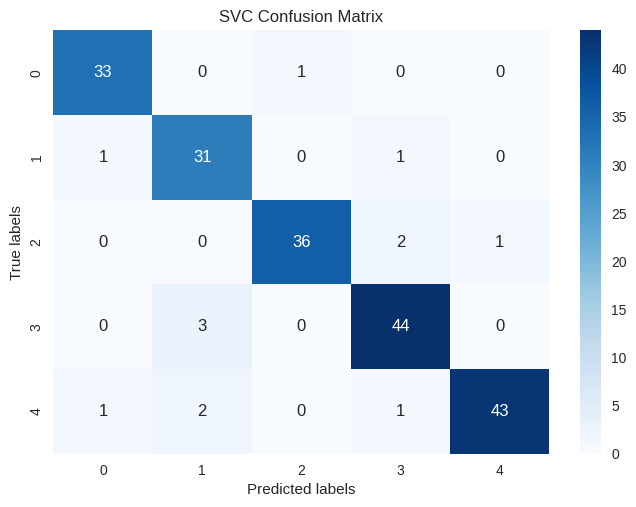

In [42]:
SVC_train, SVC_test = Svc(x_train, y_train, x_test, y_test)

##  **Knn**

**Apply KNN and plot the confusion matrix and calssification report**

In [43]:
def knn(x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=3)
    KNN_train, KNN_test = model_fit(x_train, y_train, x_test, y_test, knn, "knn")
    return KNN_train, KNN_test

Score knn 
77.0

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        34
           1       0.74      0.79      0.76        33
           2       0.75      0.69      0.72        39
           3       0.89      0.68      0.77        47
           4       0.77      0.87      0.82        47

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200




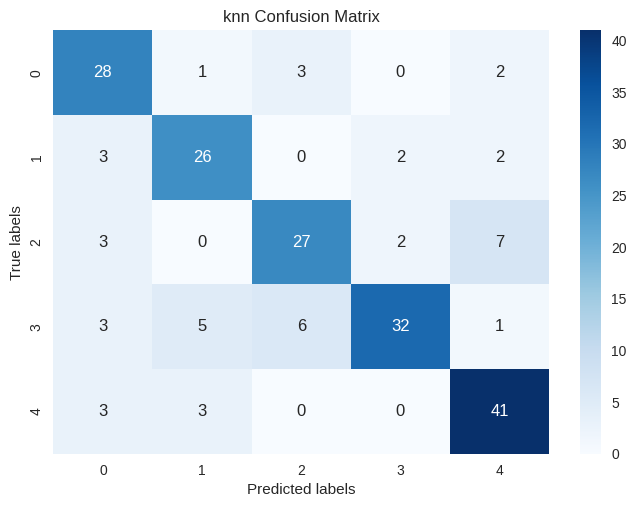

In [44]:
KNN_train, KNN_test = knn(x_train, y_train, x_test, y_test)

## **Random Forest**

**Apply Random forest and plot the confusion matrix and calssification report**

In [45]:
def RandomForest(x_train, y_train, x_test, y_test):
    RandomForest = RandomForestClassifier(
        n_estimators=200, criterion="entropy", random_state=42
    )
    RF_train, RF_test = model_fit(
        x_train, y_train, x_test, y_test, RandomForest, "Random Forest"
    )
    return RF_train, RF_test

Score Random Forest 
88.5

              precision    recall  f1-score   support

           0       0.97      0.85      0.91        34
           1       0.87      0.79      0.83        33
           2       0.89      0.85      0.87        39
           3       0.82      0.96      0.88        47
           4       0.92      0.94      0.93        47

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200




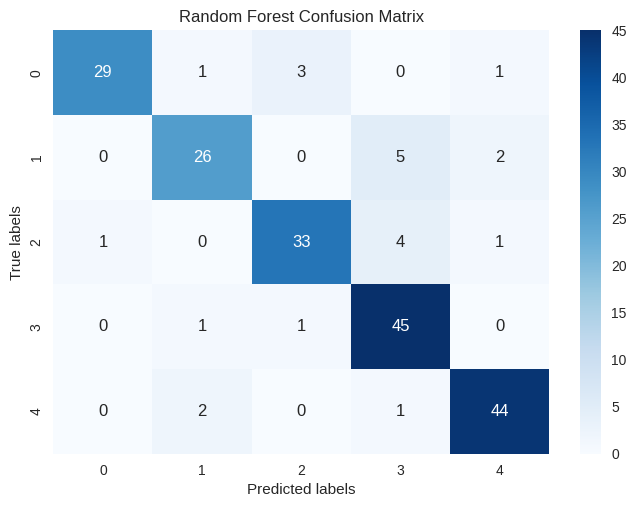

In [46]:
RF_train, RF_test = RandomForest(x_train, y_train, x_test, y_test)

##  **SGD**

**Apply SGD and plot the confusion matrix and calssification report**

In [47]:
def SGD(x_train, y_train, x_test, y_test):
    SGD = SGDClassifier(random_state=42)
    SGD_train, SGD_test = model_fit(x_train, y_train, x_test, y_test, SGD, "SGD")
    return SGD_train, SGD_test

Score SGD 
82.0

              precision    recall  f1-score   support

           0       0.86      0.74      0.79        34
           1       0.72      0.94      0.82        33
           2       0.79      0.85      0.81        39
           3       0.87      0.70      0.78        47
           4       0.88      0.89      0.88        47

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200




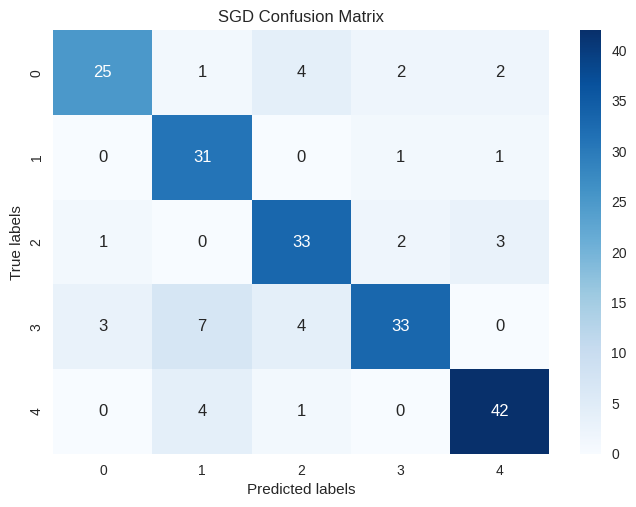

In [48]:
SGD_train, SGD_test = SGD(x_train, y_train, x_test, y_test)

##  **XGB**

**Apply XGB and plot the confusion matrix and calssification report**

In [49]:
def XGB(x_train, y_train, x_test, y_test):
    XGB = xgb.XGBClassifier(random_state=42)
    XGB_train, XGB_test = model_fit(x_train, y_train, x_test, y_test, XGB, "XGB")
    return XGB_train, XGB_test

Score XGB 
89.5

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.86      0.91      0.88        33
           2       0.89      0.87      0.88        39
           3       0.85      0.85      0.85        47
           4       0.96      0.94      0.95        47

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200




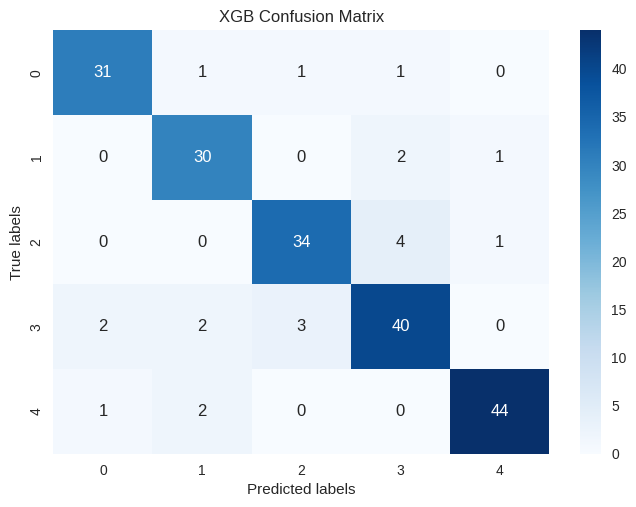

In [50]:
XGB_train, XGB_test = XGB(x_train, y_train, x_test, y_test)

## **Compare the performance of different models**

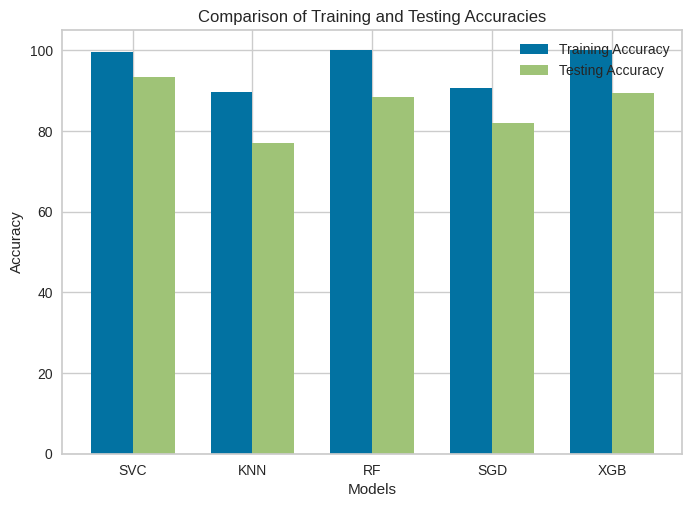

In [51]:
train_acc = [SVC_train, KNN_train, RF_train, SGD_train, XGB_train]
test_acc = [SVC_test, KNN_test, RF_test, SGD_test, XGB_test]

models = ["SVC", "KNN", "RF", "SGD", "XGB"]
width = 0.35

# X coordinates for the bars
x = range(len(models))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training accuracy bars
ax.bar(x, train_acc, width, label="Training Accuracy")

# Plot the testing accuracy bars
ax.bar([i + width for i in x], test_acc, width, label="Testing Accuracy")

# Set the x-axis labels to be the model names
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models)

# Set axis labels and title
ax.set_ylabel("Accuracy")
ax.set_xlabel("Models")
ax.set_title("Comparison of Training and Testing Accuracies")

# Add a legend
ax.legend()

# Show the plot
plt.show()

## Displaying the word cloud of words for each genre

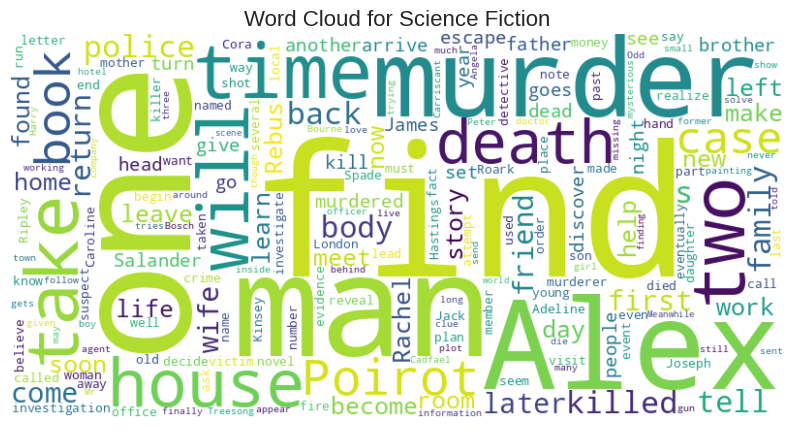

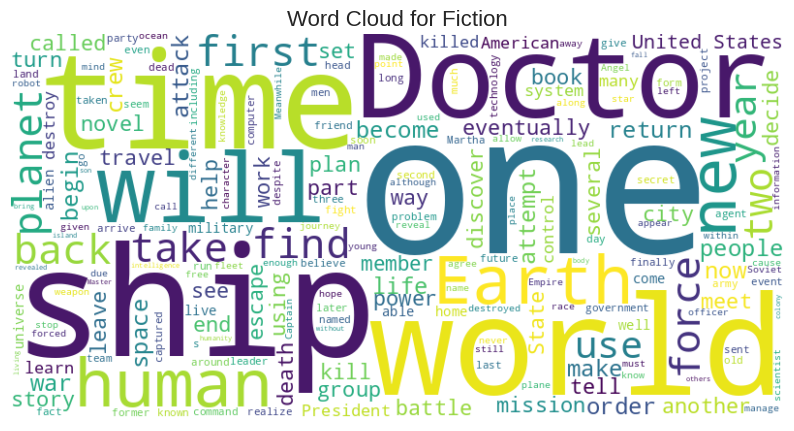

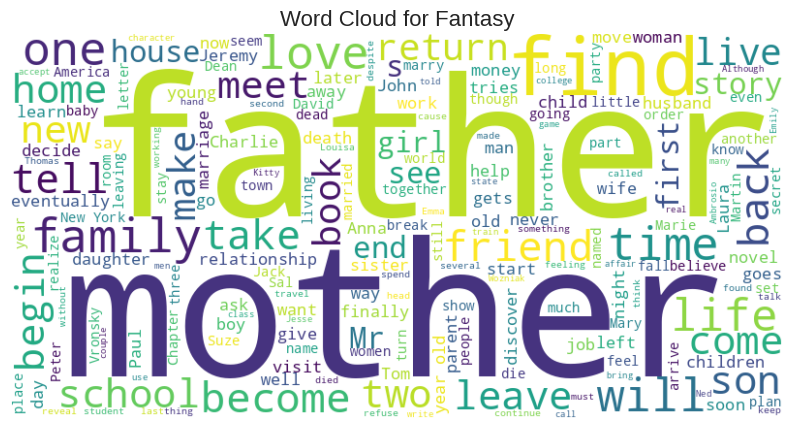

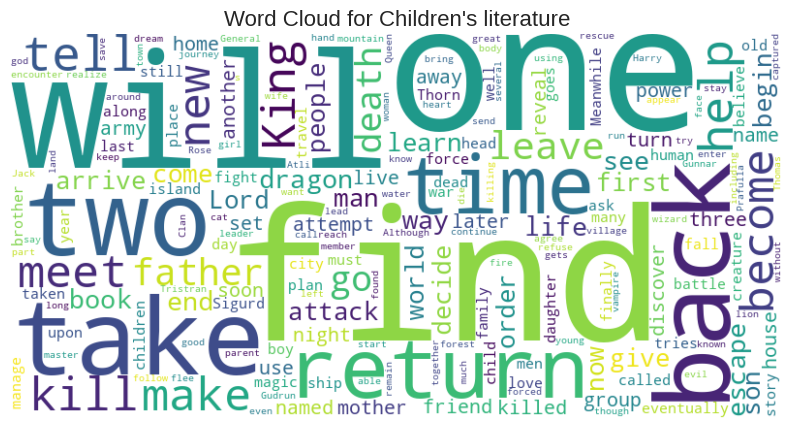

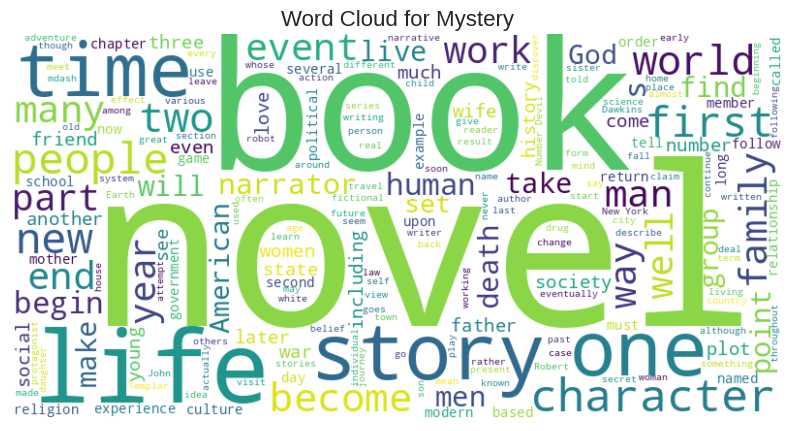

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already read the DataFrame into the 'df' variable

# Create a dictionary to define the mapping of labels to genres
label_to_genre = {
    0: "Science Fiction",
    1: "Fiction",
    2: "Fantasy",
    3: "Children's literature",
    4: "Mystery",
}

grouped_df = random_sample.groupby("labels")

# Generate and display word clouds for each genre
for label, group in grouped_df:
    genre = label_to_genre[label]
    summaries = " ".join(group["Summary"])

    # Create a WordCloud object with custom settings
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
        summaries
    )

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {genre}", fontsize=16)
    plt.axis("off")
    plt.show()


# **Chatbot**

## Read files

In [54]:
random_sample = pd.read_csv("Final_output.csv" , sep = ";")
train_data = pd.read_csv("Embeddings.csv" , sep = ";")


## Create a dictionary of the Book Title and its Word2Vec Representation

In [55]:
embeddings_dict = {}
for i in range(1000):
    book_title = random_sample["Book Title"].iloc[i]
    embedding = train_data.iloc[i].values

    embeddings_dict[book_title] = embedding

## Using Cosine Similarity to recommend the most similar 5 books for a book title in the same genre

In [56]:
def get_similar_books_in_same_genre(dataframe,input_book_title, book_embeddings, genre_mapping, num_similar_books=5):
    input_genre = genre_mapping.get(input_book_title) # Read input from user
    genres = dataframe["Genres"].unique()
    if input_book_title in book_embeddings: # Check if the book exists in our dataset
        input_embedding = book_embeddings[input_book_title]

        similarities = {}
        for book_title, embedding in book_embeddings.items(): # Calculating the cosine similarity of the requested book and all books in the same cluster
            if book_title != input_book_title and genre_mapping.get(book_title) == input_genre:
                similarity = cosine_similarity([input_embedding], [embedding])[0][0]
                similarities[book_title] = similarity

        similar_books = sorted(similarities, key=similarities.get, reverse=True)
        similar_books = [f'"{book}"' for book in similar_books if book != input_book_title][:num_similar_books]
        return  f'Here are the most similar books for you :  {" - ".join(similar_books)} ........ Enter a different genre or book for another recommendation!.'
    else: # Give the user five random books from the dataset
        random_books = []
        for genre in genres:
            genre_books = dataframe[dataframe["Genres"] == genre]
            random_book_title = random.choice(genre_books["Book Title"].tolist())
            random_books.append(
                f"'{random_book_title}' from the '{genre}' genre."
            )

        return f"I'm sorry, I don't have any recommendation for this but you can Try {random_books}"

In [58]:
genre_mapping = dict(zip(random_sample["Book Title"], random_sample["Genres"]))
get_similar_books_in_same_genre(random_sample,"Bitter Lemons",embeddings_dict , genre_mapping)

'Here are the most similar books for you :  "Epic" - "Hombres de maíz" - "Enemies, a Love Story" - "Music for Chameleons" - "Many and Many a Year Ago" ........ Enter a different genre or book for another recommendation!.'

## Using the new genres to recommend 5 books in the same genre

In [59]:
genre_mapping = dict(zip(random_sample["Book Title"], random_sample["Genres"]))

def recommend_books_by_genre(dataframe, input_genre):
    genres = dataframe["Genres"].unique()
    # taking different input genres from users and mapping them to one of the unique genres in the dataset
    if input_genre in ['crime', 'suspense', 'detective', 'thriller', 'spy fiction',  'hardboiled', 'whodunnit', 'music', 'cabal', 'conspiracy', 'cyberpunk' ]:
        input_genre = 'mystery'
    elif input_genre in ['war', 'novel', 'ya', 'non-fiction', 'comic', 'novella', 'utopian', 'dystopian', 'action']:
        input_genre = 'fiction'
    elif input_genre in ['adventure', 'horror', 'comedy', 'historical', 'parallel','humour']:
        input_genre = 'fantasy'
    elif input_genre in ['satire', 'short story', 'romance', 'autobiography', 'biography', 'gothic', 'goth',"children's literature"]:
        input_genre = "children's literature"
    elif input_genre in ['speculative fiction']:
        input_genre = 'science fiction'
    if input_genre in genres: # Check if the requested genre is in our dataset
        genre_books = dataframe[dataframe["Genres"] == input_genre]
        recommended_books = genre_books.sample(n=5)
        return f'{" - ".join(recommended_books["Book Title"].tolist())} ............... Enter a different genre or book for another recommendation!.'
    else: # Give the user five random books from the dataset
        random_books = []
        for genre in genres:
            genre_books = dataframe[dataframe["Genres"] == genre]
            random_book_title = random.choice(genre_books["Book Title"].tolist())
            random_books.append(
                f"'{random_book_title}' from the '{genre}' genre."
            )

        return f"I'm sorry, I don't have any recommendation for this type of books but you can Try {random_books}"

In [60]:
recommend_books_by_genre(random_sample, "code")

'I\'m sorry, I don\'t have any recommendation for this type of books but you can Try ["\'Past Continuous\' from the \'Fiction\' genre.", "\'Meg: Primal Waters\' from the \'Fantasy\' genre.", "\'Wintle\'s Wonders\' from the \'Children\'s literature\' genre.", "\'Solar Lottery\' from the \'Science Fiction\' genre.", "\'A Taste for Death\' from the \'Mystery\' genre."]'